In [480]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
# import imagekit
# import wkhtmltopdf
import six
import pdfkit as pdf

In [151]:
df = pd.read_csv('input/the_oscar_award.csv')

In [489]:
y = pd.read_csv('input/df.csv')
display(y)

,year_film,year_ceremony,ceremony,category,name,film,win,cat__c
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,ACTOR
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,ACTOR
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,ACTRESS
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,ACTRESS
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,ACTRESS
...,...,...,...,...,...,...,...,...
9837,2018,2019,91,WRITING (Original Screenplay),Written by Deborah Davis and Tony McNamara,The Favourite,False,WRITING
9838,2018,2019,91,WRITING (Original Screenplay),Written by Paul Schrader,First Reformed,False,WRITING
9839,2018,2019,91,WRITING (Original Screenplay),"Written by Nick Vallelonga, Brian Currie, Pete...",Green Book,True,WRITING
9840,2018,2019,91,WRITING (Original Screenplay),Written by Alfonso Cuarón,Roma,False,WRITING


In [526]:
# display(y)
#Resumen nominaciones y galardones
a = y[['film','win','category','year_ceremony']][(y['name']=='Penélope Cruz')].groupby(['year_ceremony','category','film','win']).agg('count')
#Total Galardones
len(y[(y['name']=='Scarlett Johansson') & (y['win']==True)])
#Total nominaciones
len(y[(y['name']=='Penélope Cruz')])

def resumenPremios(y, consulta):
    nominaciones = str(len(y[(y['name']==consulta)]))
    premios = str(len(y[(y['name']==consulta) & (y['win']==True)]))
    share = str(int(premios)/int(nominaciones)*100)[:4]
    return '{} has won {} Oscars out of {} nominations - {}%'.format(consulta, premios, nominaciones, share)

def tablaPremios(y, consulta):
     return y[['film','win','category','year_ceremony']][(y['name']==consulta)].groupby(['year_ceremony','category','film','win']).agg('count')

print(resumenPremios(y, 'Penélope Cruz'))
display(tablaPremios(y, 'Penélope Cruz'))
# print(a)

def resumenYear(y, year):
    df_1 = y[(y['cat__c'] == 'ACTOR')|(y['cat__c'] == 'BEST PICTURE')|(y['cat__c'] == 'ACTRESS')|(y['cat__c'] == 'DIRECTING')]
    df_2 =  df_1[['film','win','category','year_ceremony','name']] [(y['year_ceremony'] == year) ]
    df = df_2.groupby(['year_ceremony','category','name','film','win']).agg('count')
    df.reset_index().to_csv('./output/historico_anyo.csv', index=False)
    df.to_html('./output/resumenYear.html')
    return df.reset_index()




Penélope Cruz has won 1 Oscars out of 3 nominations - 33.3%


,,,
year_ceremony,category,film,win
2007,ACTRESS IN A LEADING ROLE,Volver,False
2009,ACTRESS IN A SUPPORTING ROLE,Vicky Cristina Barcelona,True
2010,ACTRESS IN A SUPPORTING ROLE,Nine,False


OSError: No such file: ./output/{}

In [523]:
pdf.from_file('./output/resumenYear.html', './output/ejemplo.pdf')

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

In [508]:

e = resumenYear(y, 2010)
type(e)

pdf.from_file('test.html', './output/pdfPrintOut.pdf')

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


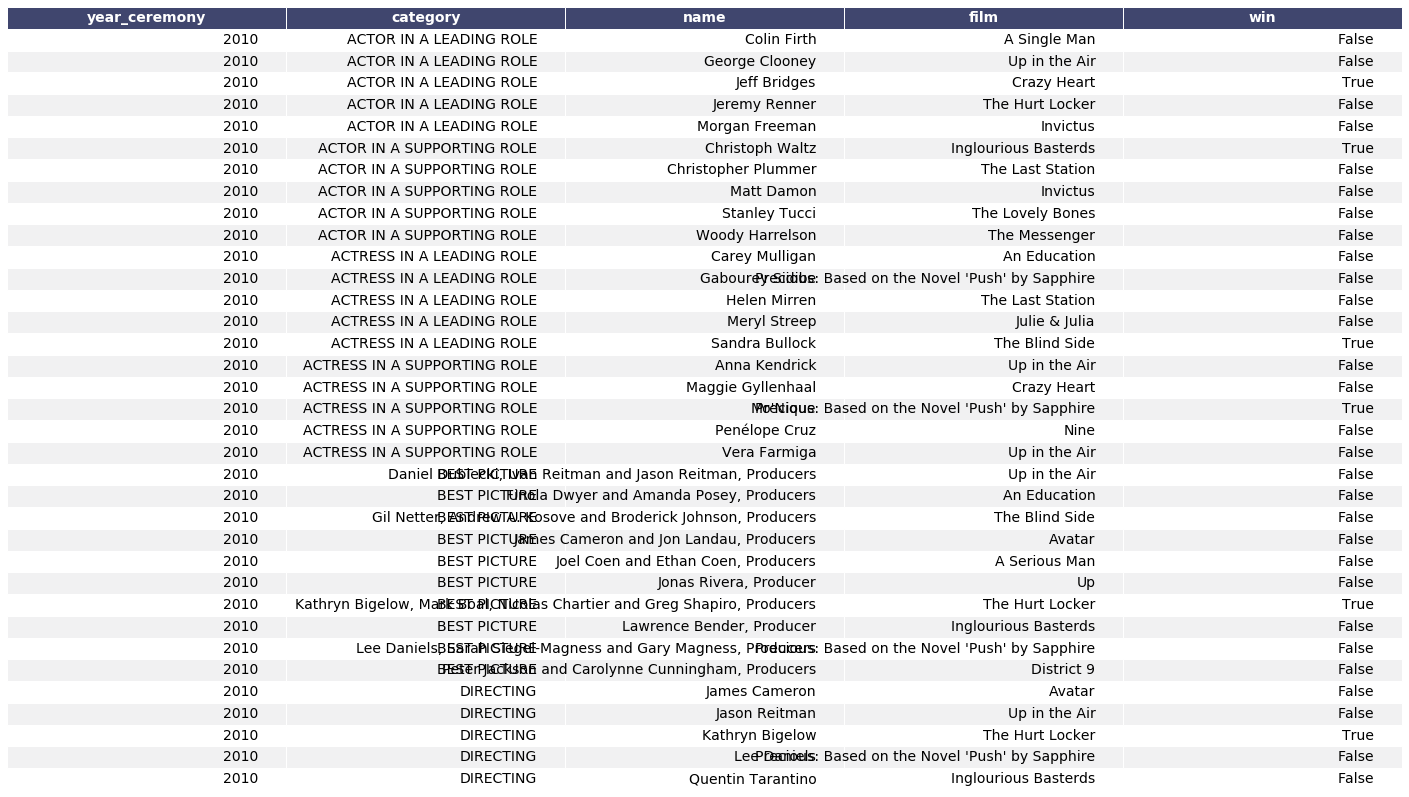

In [479]:
def render_mpl_table(data, col_width=3.0, row_height=0.4, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(resumenYear(y, 2010), header_columns=0, col_width=5.0)

In [458]:
len(y[(y['name']=='Scarlett Johansson') & (y['win']==True)])

0

In [387]:
print(len(y[(y['name'] == 'Scarlett Johansson')]))

0


In [236]:
y['cat__c'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY', 'DIRECTING',
       'OUTSTANDING PICTURE', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT', 'FILM EDITING', 'MUSIC',
       'OUTSTANDING MOTION PICTURE', 'DOCUMENTARY', 'BEST MOTION PICTURE',
       'COSTUME DESIGN', 'FOREIGN LANGUAGE FILM', 'SOUND', 'BEST PICTURE',
       'SOUND EFFECTS', 'SPECIAL EFFECTS', 'SPECIAL VISUAL EFFECTS',
       'SPECIAL ACHIEVEMENT AWARD', 'SHORT FILM', 'VISUAL EFFECTS',
       'MAKEUP', 'SOUND EFFECTS EDITING', 'SOUND EDITING',
       'ANIMATED FEATURE FILM', 'SOUND MIXING', 'MAKEUP AND HAIRSTYLING',
       'PRODUCTION DESIGN'], dtype=object)

In [152]:
null_cols = df.isnull().sum()
for col in df.columns:
    print(col,': ',int(df[col].isnull().sum()),'/',str(df[col].isnull().sum()/df.shape[0]*100)[:4], '%')
print('\nTotal nulos: ',null_cols.sum())

year_film :  0 / 0.0 %
year_ceremony :  0 / 0.0 %
ceremony :  0 / 0.0 %
category :  0 / 0.0 %
name :  0 / 0.0 %
film :  0 / 0.0 %
win :  0 / 0.0 %

Total nulos:  0


In [153]:
df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
win                bool
dtype: object

In [154]:
for col in df.columns:
    print(col, '->', df[col].nunique())

year_film -> 91
year_ceremony -> 91
ceremony -> 91
category -> 99
name -> 6223
film -> 4731
win -> 2


In [379]:
display(df)
df[['film','win']][(df['name']=='scarlett johansson')].groupby(['win','film']).agg('count')

,year,film
0,2021,Sing 2
1,2020,Black Widow
2,2019,Jojo Rabbit
3,2019,Historia de un matrimonio
4,2019,Vengadores: Endgame
...,...,...
61,1996,"Si no te casas, me mato"
62,1996,Manny & Lo
63,1995,El cliente
64,1995,Causa justa


KeyError: "['win'] not in index"

In [156]:
def CorrigeCaracteresRaros(df,lista_columnas):
    for col in lista_columnas:
        df[col] = df[col].apply(lambda x: x.encode('cp1252').decode('utf-8'))
decode(df, ['name','film'])
display(df)

NameError: name 'decode' is not defined

In [ ]:
import re
def cat(e):
    l = ['WRITING','MUSIC','SHORT SUBJECT','SPECIAL ACHIEVEMENT AWARD','SHORT FILM','CINEMATOGRAPHY','DIRECTING','ART DIRECTION','COSTUME DESIGN','DOCUMENTARY']
    for i in l:
        result = re.search(i, str.upper(str(e)))
        if result:
            return i
    else:
        return e
df['cat__c'] = df['category'].apply(cat,1)

In [373]:
consulta = 'scarlett johansson'
tipo = 'actress'
def urlImdb(string):
    result = ''
    for i in string.split(' '):
        result += ('+'+i)
    url= 'https://www.imdb.com/find?ref_=nv_sr_fn&q={}&s=all'.format(result.strip('+'))
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    return 'https://www.imdb.com'+ soup.find("table").find_all('tr')[0]('a')[1]['href']
    
url = UrlImdb(consulta)
print(UrlImdb(consulta))


https://www.imdb.com/name/nm0424060/


In [374]:
def createSoup(url):
    return BeautifulSoup(requests.get(url).text)

soup = createSoup(url)

In [375]:
print(soup.select('#name-born-info > time > a:nth-child(1)'))
print(soup.find('time').text)
fecha = soup.find('time').text.replace('\n','').replace('      ',' ')
soup.find_all('time')

[<a href="/search/name?birth_monthday=11-22&amp;refine=birth_monthday">November 22</a>]

November 22, 
     
1984



[<time datetime="1984-11-22">
 <a href="/search/name?birth_monthday=11-22&amp;refine=birth_monthday">November 22</a>, 
      
 <a href="/search/name?birth_year=1984">1984</a>
 </time>]

In [376]:
# Numero de películas

def numPeliculas(soup, tipo):
    num = soup.find('div', {'id':'filmography'}).find('div', {'id':"filmo-head-{}".format(tipo)}).text.strip().split(' ')[1].replace('(', '')
    return 'Total movies as {} --> {}'.format(tipo, str(num))

numPeliculas(soup, tipo)

'Total movies as actress --> 66'

In [329]:
soup.find('div', {'id':'filmography'}).find('div', {'id':"filmo-head-{}".format(tipo)})

<div class="head" data-category="actor" id="filmo-head-actor" onclick="toggleFilmoCategory(this);">
<span class="hide-link" id="hide-actor">Hide <img alt="Hide" class="absmiddle" height="16" src="https://m.media-amazon.com/images/G/01/imdb/images/icons/hide-1061525577._CB470041821_.png" width="18"/></span>
<span class="show-link" id="show-actor">Show <img alt="Show" class="absmiddle" height="16" src="https://m.media-amazon.com/images/G/01/imdb/images/icons/show-582987296._CB470041798_.png" width="18"/></span>
<a name="actor">Actor</a> (49 credits)
</div>

In [579]:
def dfFilmografia(soup,tipo):
    movies = {'year':[], 'film':[]}
    for d in soup.find_all(id=re.compile('^{}-.*'.format(tipo))):
        movies['year'].append(d.find(class_='year_column').get_text(' ', strip=True).strip('/I')[:4])
        movies['film'].append(d.b.get_text(' ', strip=True))
    films = pd.DataFrame(movies)
    films['year'] = pd.to_numeric(films['year'], errors='coerce')
    films_ = films[films['year'].notnull()]
    films_['year'] = films_['year'].astype('int')
    films_.to_csv('./output/historico_peliculas.csv', index=False)
    return films_

df = dfFilmografia(soup, tipo)
# display(df)
# # display(df)
# # print(df.dtypes)
# ev = df[df['year'].notnull()].groupby('year', as_index = True).agg('count')
# # display(ev)
# # print(ev.index.min())
# # print(ev.index.max())
# ev = ev.reindex(range(int(ev.index.min()), int(ev.index.max())))
# ev.fillna(0)

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


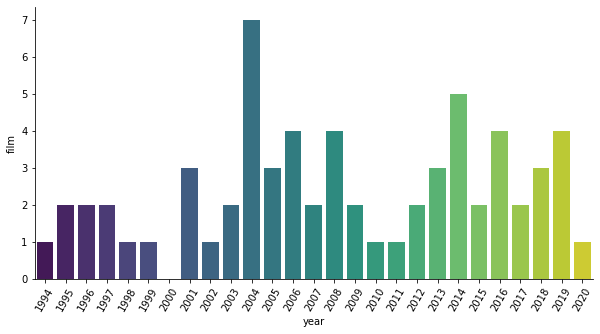

In [716]:
def chartFilmografia(df):
    ev = df[(df['year'] != '') & (df['year'].notnull())].groupby('year', as_index = True).agg('count')
    ev.fillna(0)
    ev.index = ev.index.map(int)
    ev = ev.reindex(range(ev.index.min(), ev.index.max()+1))
#     ev = ev.reindex(range(int(ev.index.min()), int(ev.index.max())))
    plt.figure(figsize=(10, 5))
    fig.title(u'Visualisation de signaux générés par le GBF')
    sns.barplot(ev.index, ev['film'], palette = 'viridis')
    plt.xticks(rotation=60)
    ax = plt.axes()
    ax.set_title('Hola')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    plt.savefig('./output/filmografia.png', dpi= 100)

charFilmografia(df)


/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


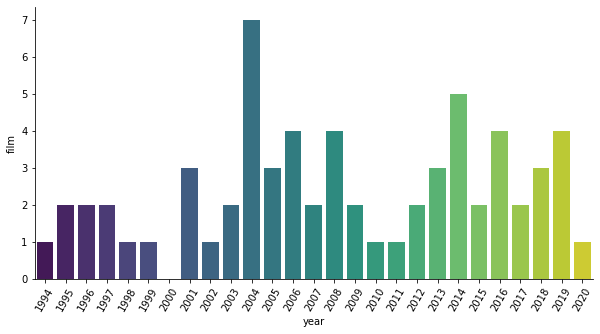

In [717]:
def chartFilmografia(df):
    ev = df[(df['year'] != '') & (df['year'].notnull())].groupby('year', as_index = True).agg('count')
    ev.fillna(0)
    ev.index = ev.index.map(int)
    ev = ev.reindex(range(ev.index.min(), ev.index.max()+1))
#     ev = ev.reindex(range(int(ev.index.min()), int(ev.index.max())))
    plt.figure(figsize=(10, 5))
    fig.title(u'Visualisation de signaux générés par le GBF')
    sns.barplot(ev.index, ev['film'], palette = 'viridis')
    plt.xticks(rotation=60)
#     ax = plt.axes()
    plt.axes.set_title('Hola')
    plt.axes.spines['right'].set_visible(False)
    plt.axes.spines['top'].set_visible(False)
    plt.axes.spines['bottom'].set_visible(True)
    plt.axes.spines['left'].set_visible(True)
    plt.savefig('./output/filmografia.png', dpi= 100)

charFilmografia(df)

In [715]:
def urlWiki(string):
    result = ''
    for i in string.split(' '):
        result += ('_'+i)
    url= 'https://en.wikipedia.org/wiki/{}'.format(result.strip('_'))
    return url

urlW = urlWiki('Matthew McConaughey')

print(urlW)

https://en.wikipedia.org/wiki/Matthew_McConaughey


In [569]:
soupW = createSoup(urlW)
print(soupW.find('tbody').find_all('tr')[2])

<tr><th scope="row">Born</th><td><div class="nickname" style="display:inline">Thomas Cruise Mapother IV</div><br/><span style="display:none"> (<span class="bday">1962-07-03</span>) </span>July 3, 1962<span class="noprint ForceAgeToShow"> (age 57)</span><br/><div class="birthplace" style="display:inline"><a href="/wiki/Syracuse,_New_York" title="Syracuse, New York">Syracuse, New York</a>, U.S.</div></td></tr>


In [192]:
# count = 0
# for i in soupW.find('tbody').find_all('tr'):
#     print(count)
#     print(i.text)
#     count += 1

In [571]:
def infoGeneral(soupW):
    print ('Name: ',soupW.find('tbody').find_all('tr')[2].find('div', {'class':"nickname"}).text.strip())
    print ('Birth date: ',soupW.find('tbody').find_all('tr')[2].find('span', {'class':"bday"}).text.strip())
    print ('Birth place :',soupW.find('tbody').find_all('tr')[2].find('div', {'class':"birthplace"}).text.strip())

infoGeneral(soupW)

Name:  Thomas Cruise Mapother IV
Birth date:  1962-07-03
Birth place : Syracuse, New York, U.S.


In [573]:
def resumenPelicula(y, pelicula):
    df_1 = y[(y['cat__c'] == 'ACTOR')|(y['cat__c'] == 'BEST PICTURE')|(y['cat__c'] == 'ACTRESS')|(y['cat__c'] == 'DIRECTING')]
    df_2 =  df_1[['film','win','category','year_ceremony','name']] [(y['film'] == pelicula) ]
    df = df_2.groupby(['year_ceremony','category','name','film','win']).agg('count')
    df.reset_index().to_csv('./output/pelicula.csv', index=False)
    df.to_html('./output/pelicula.html')
    return df.reset_index()

In [701]:
pelicula = 'Avatar'
resumenPelicula(y, pelicula)
print(urlImdb(pelicula))
soupPeli = createSoup(urlImdb(pelicula))


/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


https://www.imdb.com/title/tt0417299/


In [703]:
soupPeli.find('div', {'class':"summary_text"}).text.strip()
print(soupPeli.find('div', {'class':"credit_summary_item"}).text.strip().replace('\n', ' '))
print(str(soupPeli.select('#titleStoryLine > div:nth-child(10) > a')).split(' ')[2].replace(r'</a>',''))
soupPeli.find('div', {'class':'article highlighted'}).find('a').text.strip()
soupPeli.find_all('div', {'class':'txt-block'})

Creators: Michael Dante DiMartino, Bryan Konietzko
Animation,


[<div class="txt-block">
 <h4 class="inline">Taglines:</h4>
 Welcome to the Inferno                <span class="see-more inline">
 <a href="/title/tt0417299/taglines"> See more</a> »
                 </span>
 </div>, <div class="txt-block">
 <h4 class="inline">Certificate:</h4>
 <span>A</span>
 <span class="ghost">|</span> <span class="see-more inline">
 <a href="/title/tt0417299/parentalguide#certification"> See all certifications</a> »
             </span>
 </div>, <div class="txt-block">
 <h4 class="inline">Parents Guide:</h4>
 <span class="see-more inline">
 <a href="/title/tt0417299/parentalguide"> View content advisory</a> »
         </span>
 </div>, <div class="txt-block">
 <h4 class="inline">Official Sites:</h4>
 <a href="/offsite/?page-action=offsite-facebook&amp;token=BCYhjnHkilhBqX9M1pCMlYqy83Q0sQqnnYmhypxodM6TbmP123EaMw05fG41CGeMtF82sbktNQRT%0D%0AsYk8c-uB7BdTJyYzAdKoAu1wAiQwq4eo6-TaT4wGCwhRmWqdw033ZGduSmG0WGC7txxBCqetUeKw%0D%0AerwvGsBgHpLUx3mqxGzqF8eMdJv2QR-GCqFQDSbkRQnUsrj

In [686]:
def infoPelicula(soupPeli):
    print('Sinopsis: ',soupPeli.find('div', {'class':"summary_text"}).text.strip(),'\n')
    print(soupPeli.find('div', {'class':"credit_summary_item"}).text.strip().replace('\n', ' '),'\n')
    print('Genre: ',str(soupPeli.select('#titleStoryLine > div:nth-child(10) > a')).split(' ')[2].replace('</a>]',''))
    print('\n')
    for i in soupPeli.find_all('div', {'class':'txt-block'}):
        if re.search(r'Gross',i.text) or re.search(r'Opening',i.text) :
            print(i.text.replace('(estimated)','').replace('\n',''),'\n')
        if re.search(r'Budget',i.text.strip()):
            print(i.text.replace('(estimated)','').strip().replace('\n',''),'\n')
infoPelicual(soupPeli)
        

Sinopsis:  A story of family, religion, hatred, oil and madness, focusing on a turn-of-the-century prospector in the early days of the business. 

Director: Paul Thomas Anderson 

Genre:  Drama


Budget:$25,000,000 

Opening Weekend USA: $190,739,30 December 2007  

Gross USA: $40,222,514         

Cumulative Worldwide Gross: $76,181,545         



In [668]:
re.search(r'world', 'hello world')

<re.Match object; span=(6, 11), match='world'>

In [411]:
def getPicture(soupW):
    url = 'https://en.wikipedia.org/'+soupW.find('table', {'class':'infobox biography vcard'}).find('a').get('href')
    return url

urlPicture = getPicture(soupW)

# import urllib.request
# import ssl

# # This restores the same behavior as before.
# x = requests.get(url=urlPicture).content
# urllib.request.urlretrieve(io.StringIO(x), "local-filename.jpg")

print(urlPicture)

https://en.wikipedia.org//wiki/File:Robin_Williams_Happy_Feet_premiere.jpg


In [410]:
# import StringIO # *much* faster than StringIO
import urllib
import Image
from io import StringIO 

file = urllib.urlopen('http://freegee.sourceforge.net/FG_EN/src/teasers_en/t_gee-power_en.gif')
im = StringIO.StringIO(file.read()) # constructs a StringIO holding the image
img = Image.open(im)
img.save('test.gif')


ModuleNotFoundError: No module named 'Image'

In [412]:
import wget
image_url = 'https://en.wikipedia.org//wiki/File:Robin_Williams_Happy_Feet_premiere.jpg'
# Invoke wget download method to download specified url image.
local_image_filename = wget.download(image_url)

# Print out local image file name.
local_image_filename


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)>

In [315]:
from fpdf import FPDF
 
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Welcome to Python!", ln=1, align="C")
pdf.output("simple_demo.pdf")

''

In [713]:
def alphabet_war(fight):
    left = {
        'w':4,
        'p':3,
        'b':2,
        's':1
    }
    right = {
        'm':4,
        'q':3,
        'd':2,
        'z':1         
    }
    r = 0
    l = 0
    for i in a:
        if i in left.keys():
            l += left[i]
        if i in right.keys():
            r += right[i]
    if r>l:
        return 'Right side wins!'
    if l>r:
        return 'Left side wins!'
    if l == r:
        return "Let's fight again!"
    
    

In [714]:
alphabet_war("zzzzs")


'Right side wins!'